In [1]:
from IPython.display import clear_output
from copy import copy,deepcopy #Utilizamos esta funcion para copiar las matrices
import numpy as np #para la gestion de los arrays 2d
import matplotlib.pyplot as plt #Para mostrar los nudos.
import pandas as pd
np.set_printoptions(threshold=np.inf,linewidth=np.inf,nanstr="n")
from Path import *
from CustomKnot import *
from CustomDatabase import *
pd.options.display.max_colwidth = 100
from KnotStar import *
import time


In [2]:
k1  = knotFromPyknotid("6_1")
k2 = deepcopy(k1)
k2.randomMovN(1000,20,percentage=True)

#k1 = CustomKnot([X(1,6,2,7), X(3,8,4,9), X(5,10,6,1), X(7,2,8,3), X(9,4,10,5)]) #5_1
#k2 = CustomKnot([X(1,8,18,7), X(2,2,3,1), X(3,14,4,15), X(5,10,6,11), X(8,15,9,16), X(9,4,10,5), X(12,12,13,11), X(13,6,14,7), X(17,16,18,17)])#5_1_random

#k1 = CustomKnot([X(1,4,2,5), X(3,6,4,1), X(5,2,6,3)]) #3_1
#k2 = CustomKnot([X(1,4,20,3), X(2,5,3,6), X(4,1,5,2), X(6,19,7,20), X(8,15,9,16), X(9,19,10,18), X(11,10,12,11), X(12,7,13,8), X(13,14,14,15), X(16,18,17,17)])

#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]) #6_1
#k2 = CustomKnot([X(1,4,18,3), X(1,9,2,8), X(4,17,5,18), X(7,12,8,13), X(9,3,10,2), X(10,5,11,6), X(11,15,12,14), X(13,6,14,7), X(16,15,17,16)])#6_1random
print(k1.crosses)
print(k2.crosses)


[X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]
[X(2,10,3,9), X(4,1,5,2), X(7,12,8,13), X(8,4,9,3), X(10,5,11,6), X(11,1,12,14), X(13,6,14,7)]


In [3]:
k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]) #6_1
k2 = CustomKnot([X(1,4,18,3), X(1,9,2,8), X(4,17,5,18), X(7,12,8,13), X(9,3,10,2), X(10,5,11,6), X(11,15,12,14), X(13,6,14,7), X(16,15,17,16)])#6_1random
areSameKnots(k1,k2,100,debug=1)

get queue len: 0    visited len 0
bestPriority 84.66666666666666 mov []
get queue len: 47    visited len 1
bestPriority 64.05555555555556 mov ['createReidemeisterII(3,10,1,3)']
get queue len: 191    visited len 2
bestPriority 59.88888888888889 mov ['createReidemeisterII(3,10,1,3)', 'crateALoop(9,0)']
get queue len: 363    visited len 3
bestPriority 56.111111111111114 mov ['createReidemeisterII(3,10,1,3)', 'crateALoop(9,0)', 'reidemeisterIII(5,12,16,check=False)']
get queue len: 526    visited len 4
bestPriority 64.05555555555556 mov ['createReidemeisterII(3,10,1,3)', 'reidemeisterIII(5,10,14,check=False)']
get queue len: 658    visited len 5
bestPriority 44.38888888888889 mov ['createReidemeisterII(3,10,1,3)', 'reidemeisterIII(5,10,14,check=False)', 'reidemeisterIII(5,15,9,check=False)']
get queue len: 690    visited len 6


(True,
 ['createReidemeisterII(3,10,1,3)',
  'reidemeisterIII(5,10,14,check=False)',
  'reidemeisterIII(5,15,9,check=False)',
  'crateALoop(9,0)'])

In [6]:
k1 = CustomKnot([X(1,6,2,7), X(3,8,4,9), X(5,10,6,1), X(7,2,8,3), X(9,4,10,5)]) #5_1
k2 = CustomKnot([X(1,8,18,7), X(2,2,3,1), X(3,14,4,15), X(5,10,6,11), X(8,15,9,16), X(9,4,10,5), X(12,12,13,11), X(13,6,14,7), X(17,16,18,17)])#5_1_random 
areSameKnots(k1,k2,100,debug=2)

get queue len: 0    visited len 0
bestPriority 78.66666666666666 mov []
1 76.0 ['crateALoop(1,0)']
2 72.0 ['crateALoop(1,1)']
3 79.0 ['crateALoop(1,2)']
4 65.33333333333334 ['crateALoop(1,3)']
5 72.0 ['crateALoop(2,0)']
6 76.0 ['crateALoop(2,1)']
7 65.33333333333334 ['crateALoop(2,2)']
8 79.0 ['crateALoop(2,3)']
9 76.0 ['crateALoop(3,0)']
10 72.0 ['crateALoop(3,1)']
11 79.0 ['crateALoop(3,2)']
12 65.33333333333334 ['crateALoop(3,3)']
13 72.0 ['crateALoop(4,0)']
14 76.0 ['crateALoop(4,1)']
15 65.33333333333334 ['crateALoop(4,2)']
16 79.0 ['crateALoop(4,3)']
17 76.0 ['crateALoop(5,0)']
18 72.0 ['crateALoop(5,1)']
19 79.0 ['crateALoop(5,2)']
20 65.33333333333334 ['crateALoop(5,3)']
21 72.0 ['crateALoop(6,0)']
22 76.0 ['crateALoop(6,1)']
23 65.33333333333334 ['crateALoop(6,2)']
24 79.0 ['crateALoop(6,3)']
25 76.0 ['crateALoop(7,0)']
26 72.0 ['crateALoop(7,1)']
27 79.0 ['crateALoop(7,2)']
28 65.33333333333334 ['crateALoop(7,3)']
29 72.0 ['crateALoop(8,0)']
30 76.0 ['crateALoop(8,1)']
31 65.

(True,
 ['crateALoop(1,3)',
  'createReidemeisterII(4,6,1,5)',
  'crateALoop(9,3)',
  'reidemeisterIII(8,16,6,check=False)',
  'undoALoop(7)',
  'crateALoop(6,0)'])

80
49.666666666666664
39.27777777777778
0.0
Cross: [X(1,12,2,13), X(2,14,3,13), X(3,14,4,15), X(5,16,6,17), X(6,8,7,7), X(9,11,10,10), X(11,18,12,1), X(15,4,16,5), X(17,8,18,9)]
Planar Diagrams:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17 17 17 17]
 [11 11 11  0  0 13 13 13 13  0  0 15 15 15 15  0  0 17 17 17  7  7 17]
 [11 18 -1  1  1 -2  2  2 -2  3  3 -2  4  4 -1  5  5 -2  6  6 -2  7 17]
 [11 18 12 12 12 12  0  0 14 14 14 14  0  0 16 16 16 16  0  0  8  0 17]
 [11 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0 17]
 [11 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 -2 17 17]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0]
 [11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 -1 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10  0]]


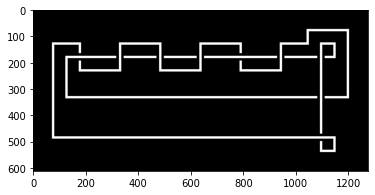

In [9]:


image = k1.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
Cross: [X(2,1,1,2)]
Planar Diagrams:
[[ 2  2  0]
 [ 2 -2  1]
 [ 0  1  1]]


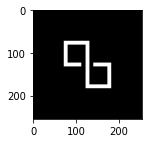

In [135]:
#k = Knot([
#  X(1,9,2,8),
  #X(2,8,1,9),
#  X(3,10,4,11), 
#  X(5,3,6,2),
#  X(7,1,8,12), 
#  X(9,4,10,5), 
#  X(11,7,12,6)])
#k = Knot([X(1,2,4,1),
#         X(2,3,3,4)])
#k = Knot([X(1,2,6,1),
#          X(4,5,5,6),
#          X(2,3,3,4)])
k = CustomKnot([X(1,2,2,3),
          X(3,4,4,5),
          X(5,1,6,6)])
k.rotate(1)


k.crateALoop(2,False)
k.crateALoop(3,False)
k.crateALoop(2,False)
k.crateALoop(1,False)
k.crateALoop(2,False)
k.crateALoop(5,False)
k.crateALoop(7,False)


print(k.createReidemeisterII(4,9,True))
print(k.createReidemeisterII(14,22,True))
print(k.createReidemeisterII(13,19,True))

print(k.undoALoop(3))
print(k.undoALoop(29))
print(k.undoALoop(25))
print(k.undoALoop(22))
print(k.undoALoop(17))
print(k.undoALoop(8))
print(k.undoALoop(6))

print(k.undoReidemeisterII(2,5))
print(k.undoReidemeisterII(8,12))
print(k.undoReidemeisterII(6,10))
print(k.undoReidemeisterII(4,6))

print(k)

#print(k.planarDiagramZones())
image = k.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')


